In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python3)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /usr/bin/python3 (found version "3.8.2") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.8.so
-- pybind11 v2.5.dev1
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/lisandro/Documents/mt/tp3
-- Configuring done
-- Generating done
-- Build files have been written to: /home/lisandro/Documents/mt/tp3/b

In [32]:
import metnum as mt

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

import util

In [7]:
df = pd.read_csv('../data/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          240000 non-null  int64  
 1   titulo                      234613 non-null  object 
 2   descripcion                 238381 non-null  object 
 3   tipodepropiedad             239954 non-null  object 
 4   direccion                   186928 non-null  object 
 5   ciudad                      239628 non-null  object 
 6   provincia                   239845 non-null  object 
 7   antiguedad                  196445 non-null  float64
 8   habitaciones                217529 non-null  float64
 9   garages                     202235 non-null  float64
 10  banos                       213779 non-null  float64
 11  metroscubiertos             222600 non-null  float64
 12  metrostotales               188533 non-null  float64
 13  idzona        

### Creo lista de ciudades únicas que aparecen en el data set

In [5]:
%%time 
#Encontrar las ciudades que mejor explican su precio en base a los features que estan abajo

df = pd.read_csv('../data/train.csv')

lista_ciudades = df['ciudad'].unique().tolist()

CPU times: user 2.78 s, sys: 188 ms, total: 2.97 s
Wall time: 2.96 s


876

### Me quedo con las columnas que me interesan del data set para hacer el análisis: 
'antiguedad','habitaciones','garages','banos','gimnasio','usosmultiples','centroscomercialescercanos','precio'

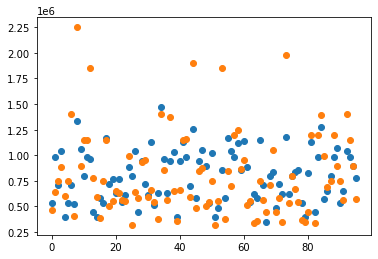

In [41]:
df = pd.read_csv('../data/train.csv')

ciudad = str(lista_ciudades[2])

df1 = df[df['ciudad'] == ciudad]

df1 = df1[['antiguedad','habitaciones','garages','banos','gimnasio','usosmultiples','centroscomercialescercanos','precio']].dropna()

x = df1[['antiguedad','habitaciones','garages','banos','gimnasio','usosmultiples','centroscomercialescercanos']].values
x.reshape(len(x),7)

y = df1[['precio']].values
y.reshape(len(y),1)

limit = int(0.85 * len(df1))

x_train, y_train = x[0:limit], y[0:limit]
x_test, y_test = x[limit:], y[limit:]

linreg = mt.LinearRegression()
linreg.fit(x_train, y_train)

a = linreg.predict(x_test)


plt.scatter([b for b in range(len(a))], a)
plt.scatter([b for b in range(len(a))], y_test)





In [24]:
a

array([[ 538318.84118133],
       [ 982762.79704725],
       [ 707096.11617807],
       [1038578.22784586],
       [ 399563.48925299],
       [ 530831.9264659 ],
       [ 706832.76374063],
       [ 520679.50849422],
       [1337790.48556753],
       [1062123.80469835],
       [ 796346.1893634 ],
       [ 982762.79704725],
       [ 965220.62263726],
       [ 441318.50084313],
       [ 399563.48925299],
       [ 578590.34049853],
       [ 530831.9264659 ],
       [1169179.40473111],
       [ 717248.53414975],
       [ 773063.96494836],
       [ 634045.26058257],
       [ 772133.35218326],
       [ 543961.73290926],
       [ 616142.57545802],
       [ 885859.61498617],
       [ 799372.2033342 ],
       [1037647.61508076],
       [ 441318.50084313],
       [ 946957.42679815],
       [ 717248.53414975],
       [ 610192.93411699],
       [1127161.04070353],
       [ 512929.24134134],
       [ 627735.10852698],
       [1475062.32522292],
       [ 964860.1119227 ],
       [ 633475.15853203],
 

In [25]:
y_test

array([[ 467000.],
       [ 645000.],
       [ 750000.],
       [ 890000.],
       [ 600000.],
       [ 750000.],
       [1400000.],
       [ 408000.],
       [2250000.],
       [ 900000.],
       [1150000.],
       [1150000.],
       [1850000.],
       [ 780000.],
       [ 595000.],
       [ 385000.],
       [ 750000.],
       [1150000.],
       [ 500000.],
       [ 550000.],
       [ 650000.],
       [ 630000.],
       [ 568000.],
       [ 550000.],
       [ 990000.],
       [ 320000.],
       [ 640000.],
       [ 580000.],
       [ 935000.],
       [ 950000.],
       [ 590000.],
       [ 660000.],
       [ 540000.],
       [ 375000.],
       [1400000.],
       [ 860000.],
       [ 565000.],
       [1370000.],
       [ 650000.],
       [ 360000.],
       [ 660000.],
       [1150000.],
       [1156500.],
       [ 590000.],
       [1900000.],
       [ 490000.],
       [ 850000.],
       [ 875000.],
       [ 503500.],
       [ 540000.],
       [ 750000.],
       [ 320000.],
       [ 550